## Model interpretation

### Investigation on the soil moisture response on rain in the soil moisture model

In [21]:
import pandas as pd
from pandas import array

import numpy as np
import time
import math
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.dates

from numpy.lib import stride_tricks

from keras.models import Model
from keras.layers import Input, LSTM, Dense, LSTMCell, RNN, Bidirectional, Concatenate, GRU, RepeatVector, TimeDistributed, Dropout, Concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras import callbacks, layers

import tensorflow as tf

from scipy import signal

#from tensorflow import keras
#from tensorflow.keras import layers
print(np.version.version)
print(tf.__version__)

1.24.1
2.11.0


### Load model

In [22]:
#new_model_m = tf.keras.models.load_model('') #fill in the directory to the model

### Read data

In [23]:
windowSize=240

data_row = pd.read_csv("data_waldstein_11_years.csv")

at = np.squeeze(data_row["AirTempHourely"].to_numpy())
pr = np.squeeze(data_row["PrecHourely"].to_numpy())
st05 = np.squeeze(data_row["SoilTempHourely"].to_numpy()) 
sm05 = np.squeeze(data_row["SoilMoiHourely"].to_numpy()) 

### Data normalisation

In [24]:
def create_norm_seq(seq,seq_norm_factor):
    seq_norm= (seq-np.min(seq_norm_factor))/(np.max(seq_norm_factor)-np.min(seq_norm_factor))
    return seq_norm

def create_re_norm_seq(seq,seq_norm_factor):
    re_norm_seq = ((seq*(max(seq_norm_factor)-min(seq_norm_factor)))+min(seq_norm_factor))#(seq-np.min(seq))/(np.max(seq)-np.min(seq))
    return re_norm_seq


### Function for model prediction

In [25]:

def predict_sequence_m(input_array_1,input_array_2):
    seqNum=np.floor(len(input_array_1)/windowSize)

    data2a = input_array_1[:int(seqNum)*windowSize]
    x1=np.split(data2a,seqNum)
    x1=np.stack(x1,axis=1)

    data2b = input_array_2[:int(seqNum)*windowSize]
    x2=np.split(data2b,seqNum)
    x2=np.stack(x2,axis=1)

    x1 = np.transpose(x1)
    x1 = x1.reshape(x1.shape[0],x1.shape[1],1)

    x2 = np.transpose(x2)
    x2 = x2.reshape(x2.shape[0],x2.shape[1],1)

    year_predict = new_model_m.predict([x1,x2],batch_size=1)

    year_predict = np.squeeze(year_predict)
    year_predict = year_predict.ravel()

    return year_predict


### Create sequences with rain peaks

In [27]:
Fs = 4800 #8760
rain_zero = np.zeros(Fs)

rain_increasing_1 = np.zeros(Fs)
rain_increasing_2 = np.zeros(Fs)
rain_increasing_3 = np.zeros(Fs)
rain_increasing_4 = np.zeros(Fs)
rain_increasing_5 = np.zeros(Fs)

rain_increasing_1[500]=0.5
rain_increasing_2[500]=1
rain_increasing_3[500]=1.5
rain_increasing_4[500]=2
rain_increasing_5[500]=2.5

rain_increasing_1[2500:2502]=0.25
rain_increasing_2[2500:2504]=0.25
rain_increasing_3[2500:2506]=0.25
rain_increasing_4[2500:2508]=0.25
rain_increasing_5[2500:2510]=0.25

rain_increasing_1[2500:2502]=0.25
rain_increasing_2[2500:2504]=0.25
rain_increasing_3[2500:2506]=0.25
rain_increasing_4[2500:2508]=0.25
rain_increasing_5[2500:2510]=0.25

rain_plot_1 = np.zeros(Fs)
rain_plot_2 = np.zeros(Fs)
rain_plot_3 = np.zeros(Fs)
rain_plot_4 = np.zeros(Fs)
rain_plot_5 = np.zeros(Fs)

rain_plot_1[500]=0.5
rain_plot_2[500]=1
rain_plot_3[500]=1.5
rain_plot_4[500]=2
rain_plot_5[500]=2.5

rain_plot_5[2300]=0.25
rain_plot_4[2350]=0.25
rain_plot_3[2400]=0.25
rain_plot_2[2450]=0.25
rain_plot_1[2500]=0.25



### Predict soil moisture based on syntetic precipitaion data with different amounts of rain having a mean air temperature of 5 °C or 15 °C

In [28]:
temp_sine_5= np.zeros(Fs)
temp_sine_5[0:4800]=5

temp_sine_norm_5 = create_norm_seq(temp_sine_5,at)

soil_sine_norm_5_1 = predict_sequence_m(temp_sine_norm_5,rain_increasing_1)
soil_sine_norm_5_1 = predict_sequence_m(temp_sine_norm_5,rain_increasing_1)
soil_sine_norm_5_2 = predict_sequence_m(temp_sine_norm_5,rain_increasing_2)
soil_sine_norm_5_3 = predict_sequence_m(temp_sine_norm_5,rain_increasing_3)
soil_sine_norm_5_4 = predict_sequence_m(temp_sine_norm_5,rain_increasing_4)
soil_sine_norm_5_5 = predict_sequence_m(temp_sine_norm_5,rain_increasing_5)

soil_sine_5_1 = create_re_norm_seq(soil_sine_norm_5_1,sm05)
soil_sine_5_2 = create_re_norm_seq(soil_sine_norm_5_2,sm05)
soil_sine_5_3 = create_re_norm_seq(soil_sine_norm_5_3,sm05)
soil_sine_5_4 = create_re_norm_seq(soil_sine_norm_5_4,sm05)
soil_sine_5_5 = create_re_norm_seq(soil_sine_norm_5_5,sm05)


20/20 [==============================] - 0s 17ms/step


In [29]:
temp_sine_15= np.zeros(Fs)
temp_sine_15[0:4800]=15

temp_sine_norm_15 = create_norm_seq(temp_sine_15,at)

soil_sine_norm_15_1 = predict_sequence_m(temp_sine_norm_15,rain_increasing_1)
soil_sine_norm_15_1 = predict_sequence_m(temp_sine_norm_15,rain_increasing_1)
soil_sine_norm_15_2 = predict_sequence_m(temp_sine_norm_15,rain_increasing_2)
soil_sine_norm_15_3 = predict_sequence_m(temp_sine_norm_15,rain_increasing_3)
soil_sine_norm_15_4 = predict_sequence_m(temp_sine_norm_15,rain_increasing_4)
soil_sine_norm_15_5 = predict_sequence_m(temp_sine_norm_15,rain_increasing_5)

soil_sine_15_1 = create_re_norm_seq(soil_sine_norm_15_1,sm05)
soil_sine_15_2 = create_re_norm_seq(soil_sine_norm_15_2,sm05)
soil_sine_15_3 = create_re_norm_seq(soil_sine_norm_15_3,sm05)
soil_sine_15_4 = create_re_norm_seq(soil_sine_norm_15_4,sm05)
soil_sine_15_5 = create_re_norm_seq(soil_sine_norm_15_5,sm05)


20/20 [==============================] - 0s 17ms/step


### Create plot for publication

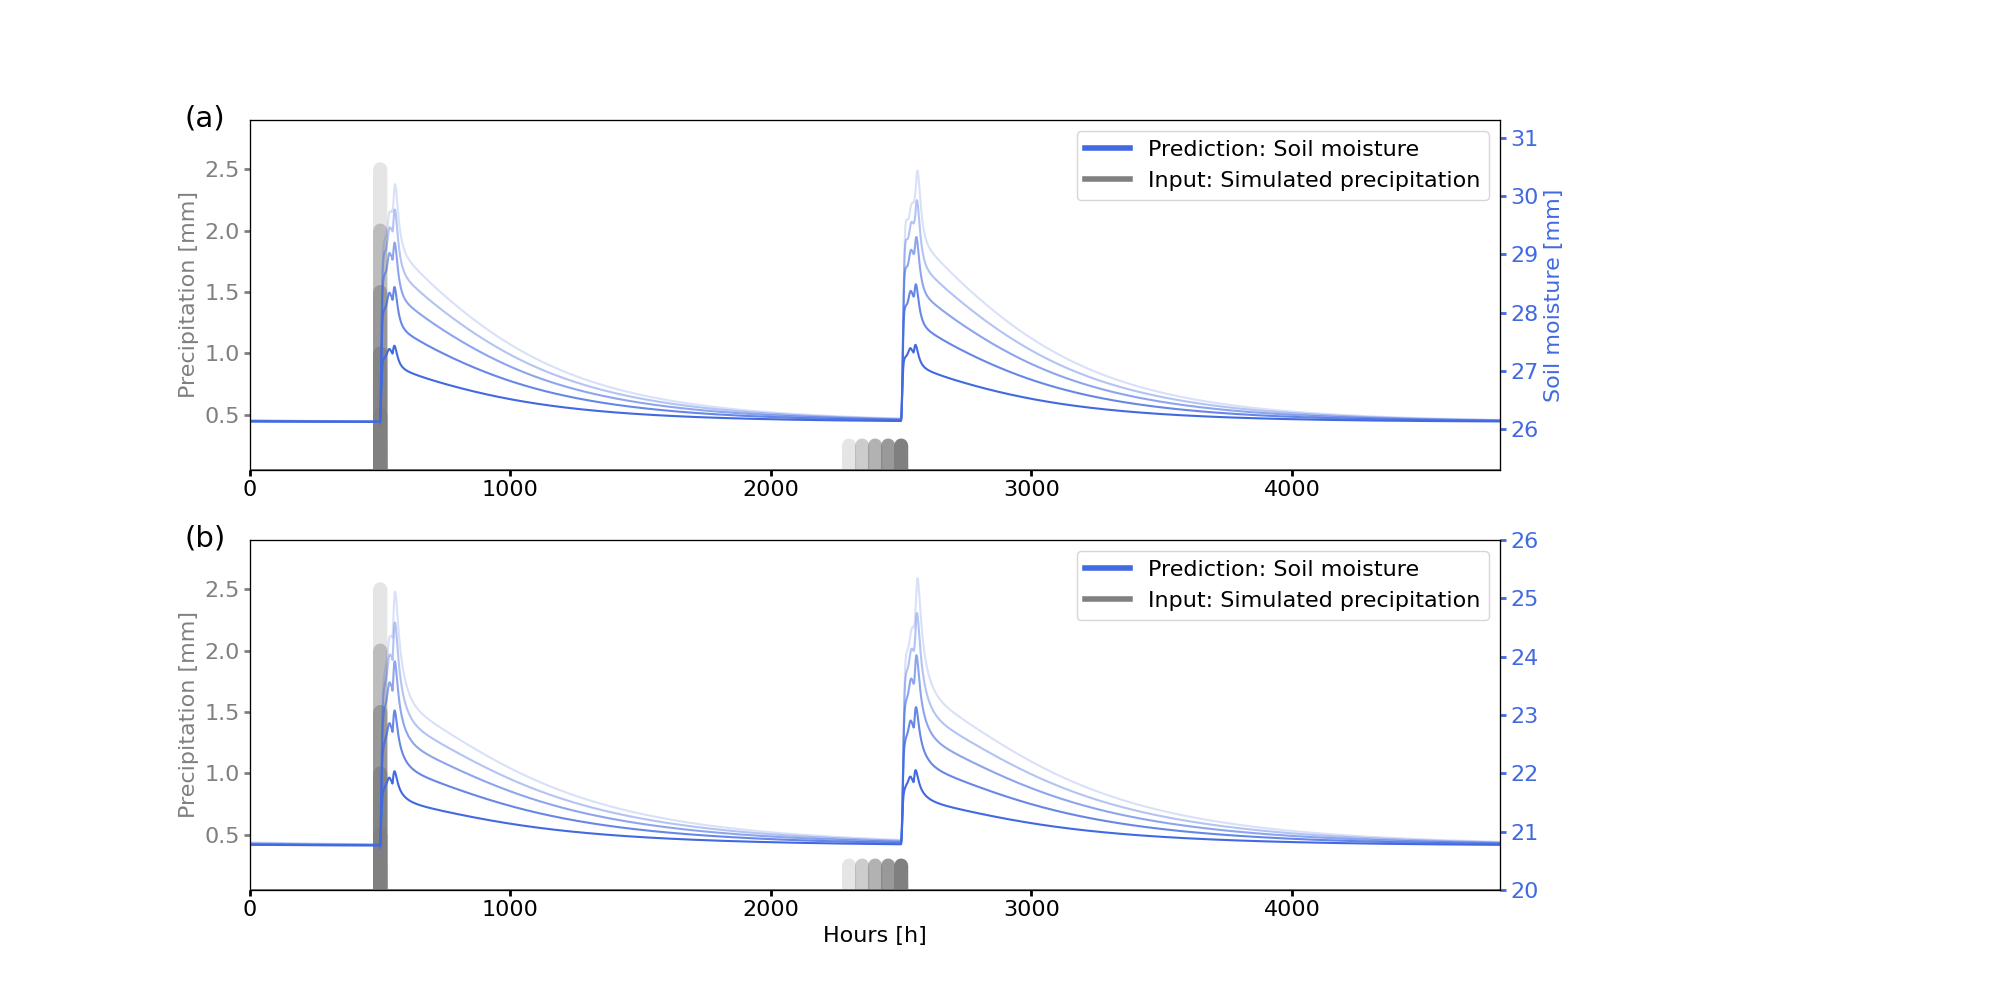

In [35]:
fig, ax = plt.subplots(2,figsize=(20,10))
fig.subplots_adjust(right=0.75)

twin1 = ax[0].twinx()
twin3 = ax[0].twinx()

p2, = ax[0].plot(rain_plot_2,label="Input: Simulated precipitation",color="grey", alpha=0.8,linewidth=10)
p2, = ax[0].plot(rain_plot_3,label="Input: Simulated precipitation",color="grey", alpha=0.6,linewidth=10)
p2, = ax[0].plot(rain_plot_4,label="Input: Simulated precipitation",color="grey", alpha=0.4,linewidth=10)
p2, = ax[0].plot(rain_plot_5,label="Input: Simulated precipitation",color="grey", alpha=0.2,linewidth=10)
p2, = ax[0].plot(rain_plot_1,label="Input: Simulated precipitation",color="grey", alpha=1,linewidth=10)

p3, = twin1.plot(soil_sine_5_2,label="Prediction: Soil moisture",color="royalblue", alpha=0.8)
p3, = twin1.plot(soil_sine_5_3,label="Prediction: Soil moisture",color="royalblue", alpha=0.6)
p3, = twin1.plot(soil_sine_5_4,label="Prediction: Soil moisture",color="royalblue", alpha=0.4)
p3, = twin1.plot(soil_sine_5_5,label="Prediction: Soil moisture",color="royalblue", alpha=0.2)
p3, = twin1.plot(soil_sine_5_1,label="Prediction: Soil moisture",color="royalblue", alpha=1)

ax[0].set_ylim([0.05,2.9])
twin1.set_ylim([25.3,31.3])

ax[0].margins(x=0)

ax[0].set_xlabel("")
ax[0].set_ylabel("Precipitation [mm]")
twin1.set_ylabel("Soil moisture [mm]")

twin3.axes.get_yaxis().set_visible(False)

ax[0].xaxis.label.set_size(16)
ax[0].yaxis.label.set_size(16)
twin1.yaxis.label.set_size(16)

ax[0].yaxis.label.set_color("grey")
twin1.yaxis.label.set_color("royalblue")

tkw = dict(size=4, width=2, labelsize=16)
ax[0].tick_params(axis='y', colors="grey", **tkw)
twin1.tick_params(axis='y', colors="royalblue", **tkw)
ax[0].tick_params(axis='x', **tkw)

leg = ax[0].legend(handles=[p3, p2],prop={'size': 16})
leg.get_lines()[0].set_linewidth(4)
leg.get_lines()[1].set_linewidth(4)
leg.remove()
twin3.add_artist(leg)

#########

twin10 = ax[1].twinx()
twin30 = ax[1].twinx()

p20, = ax[1].plot(rain_plot_2,label="Input: Simulated precipitation",color="grey", alpha=0.8,linewidth=10)
p20, = ax[1].plot(rain_plot_3,label="Input: Simulated precipitation",color="grey", alpha=0.6,linewidth=10)
p20, = ax[1].plot(rain_plot_4,label="Input: Simulated precipitation",color="grey", alpha=0.4,linewidth=10)
p20, = ax[1].plot(rain_plot_5,label="Input: Simulated precipitation",color="grey", alpha=0.2,linewidth=10)
p20, = ax[1].plot(rain_plot_1,label="Input: Simulated precipitation",color="grey", alpha=1,linewidth=10)

p30, = twin10.plot(soil_sine_15_2,label="Prediction: Soil moisture",color="royalblue", alpha=0.8)
p30, = twin10.plot(soil_sine_15_3,label="Prediction: Soil moisture",color="royalblue", alpha=0.6)
p30, = twin10.plot(soil_sine_15_4,label="Prediction: Soil moisture",color="royalblue", alpha=0.4)
p30, = twin10.plot(soil_sine_15_5,label="Prediction: Soil moisture",color="royalblue", alpha=0.2)
p30, = twin10.plot(soil_sine_15_1,label="Prediction: Soil moisture",color="royalblue", alpha=1)

ax[1].set_ylim([0.05,2.9])

twin10.set_ylim([20,26])

ax[1].margins(x=0)

ax[1].set_xlabel("Hours [h]")
ax[1].set_ylabel("Precipitation [mm]")
twin1.set_ylabel("Soil moisture [mm]")

twin30.axes.get_yaxis().set_visible(False)

ax[1].xaxis.label.set_size(16)
ax[1].yaxis.label.set_size(16)
twin10.yaxis.label.set_size(16)

ax[1].yaxis.label.set_color("grey")
twin10.yaxis.label.set_color("royalblue")

tkw = dict(size=4, width=2, labelsize=16)
ax[1].tick_params(axis='y', colors="grey", **tkw)
twin10.tick_params(axis='y', colors="royalblue", **tkw)
ax[1].tick_params(axis='x', **tkw)

leg = ax[1].legend(handles=[p30, p20],prop={'size': 16})
leg.get_lines()[0].set_linewidth(4)
leg.get_lines()[1].set_linewidth(4)
leg.remove()
twin30.add_artist(leg)

ax[0].text(-250, 2.85, "(a)", fontsize = 21)#weight='bold'
ax[1].text(-250, 2.85, "(b)", fontsize = 21)


plt.savefig('Fig6.pdf',bbox_inches='tight')